In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#Read the data
cars = pd.read_csv("/Users/chira/Downloads/cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [8]:
cars.corr()
y = cars.loc[:,'MPG']
x = cars.loc[:,cars.columns!='MPG']
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


# Scatterplot between variables along with histograms

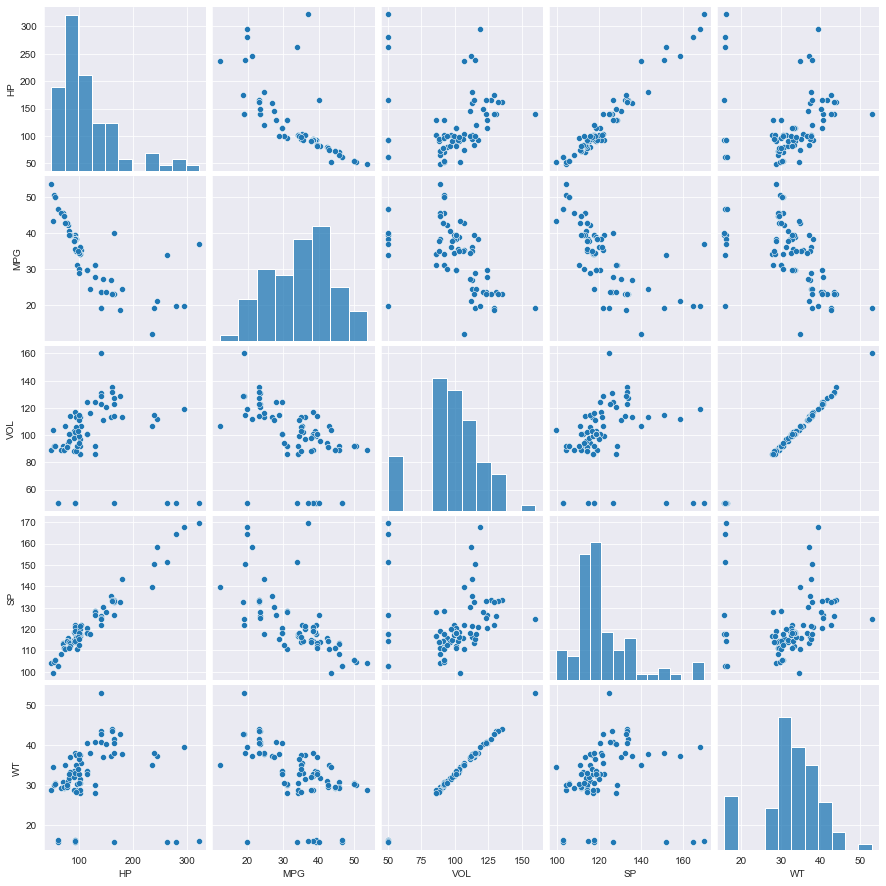

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [39]:
#Build model
import statsmodels.formula.api as smf 

#y='MPG'
model = smf.ols('MPG~HP+SP+WT',data=cars).fit()

In [40]:
#Coefficients
model.params

Intercept    28.784808
HP           -0.208502
SP            0.407753
WT           -0.599413
dtype: float64

In [41]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    1.986465
HP          -5.386453
SP           2.609482
WT          -8.894562
dtype: float64 
 Intercept    5.053995e-02
HP           7.560276e-07
SP           1.089096e-02
WT           1.914892e-13
dtype: float64


In [42]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.769482813998346, 0.7605016249333465)

# Simple Linear Regression Models

In [43]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [44]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [45]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF

In [46]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

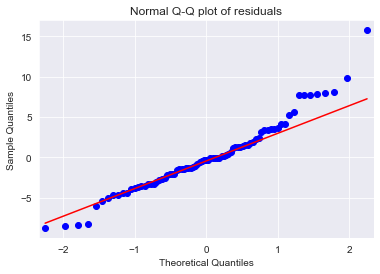

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [48]:
list(np.where(model.resid<-5))

[array([11, 17, 25, 48, 58, 70], dtype=int64)]

## Residual Plot for Homoscedasticity

In [49]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

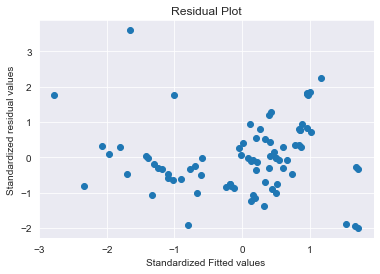

In [50]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

ValueError: 'VOL' is not in list

<Figure size 1080x576 with 0 Axes>

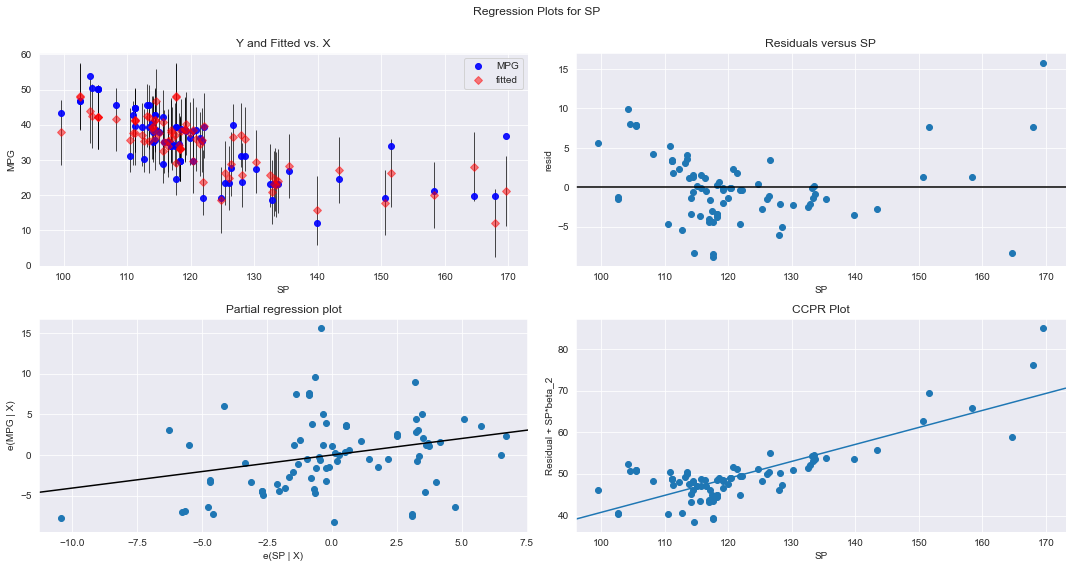

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

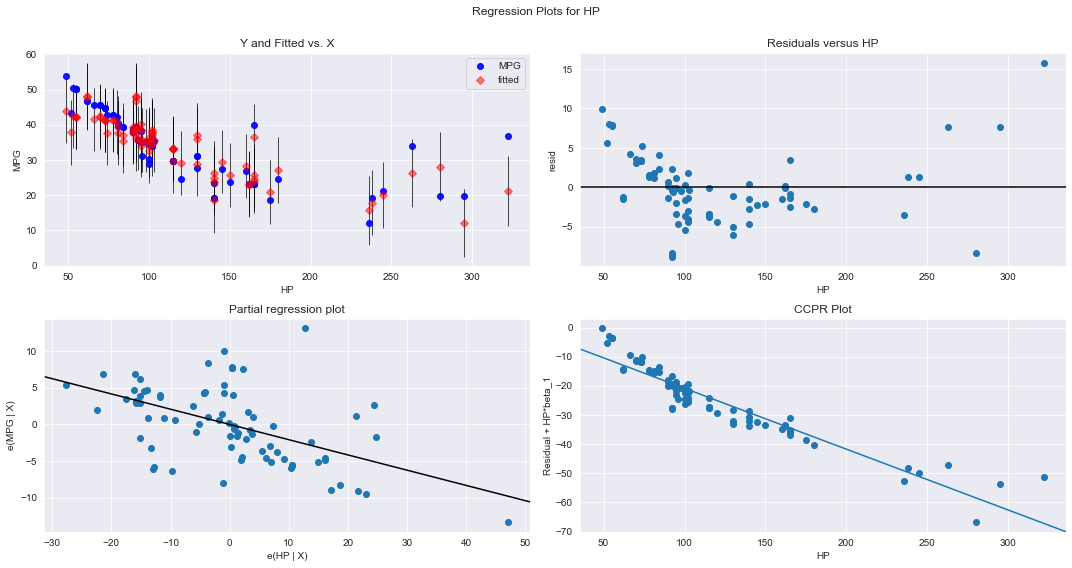

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

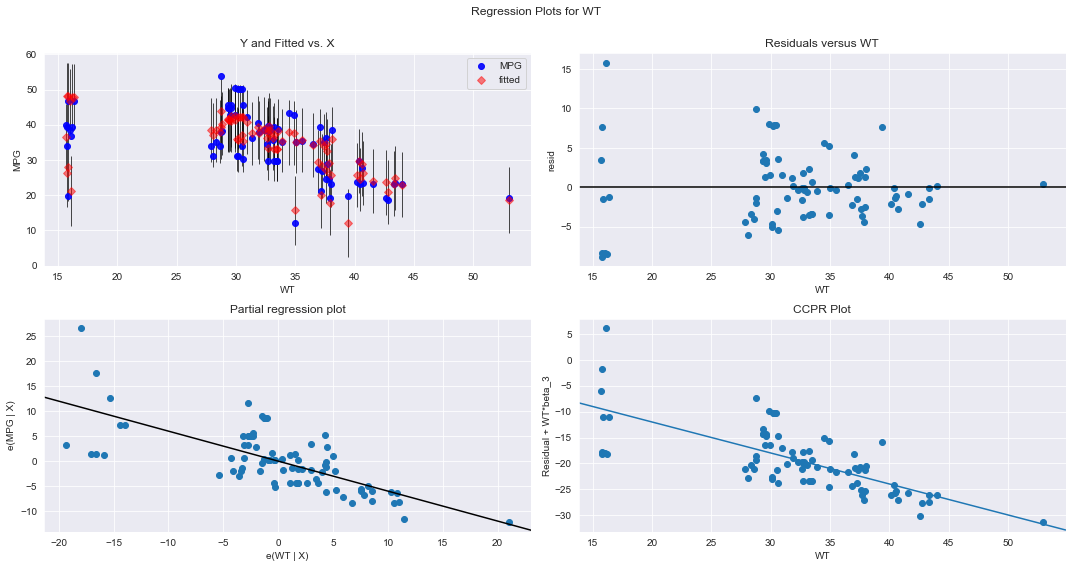

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [55]:
model_influence = model.get_influence()
(c,p)= model_influence.cooks_distance

In [56]:
c

array([4.29125830e-02, 2.40962243e-02, 2.32392548e-02, 6.31217307e-03,
       2.74548081e-02, 4.51580886e-03, 2.35947630e-02, 3.71674497e-03,
       2.24523959e-03, 1.01374913e-03, 3.20600641e-03, 9.98593414e-02,
       1.36568451e-04, 3.22045730e-03, 5.70170886e-03, 3.44081116e-03,
       6.48311103e-04, 8.96158950e-02, 8.78759685e-04, 1.80655606e-04,
       6.15148811e-05, 7.66384553e-03, 7.85597777e-06, 3.84596847e-04,
       1.60895386e-03, 7.33022612e-02, 4.29152445e-03, 2.38421350e-06,
       3.64363483e-02, 3.24061124e-05, 4.86937362e-03, 1.28518311e-03,
       4.35377520e-04, 1.41764834e-03, 9.08903676e-04, 5.71325117e-06,
       4.30893202e-04, 4.55673140e-03, 3.40474446e-03, 1.13832611e-02,
       3.38809814e-04, 1.38273522e-07, 1.67074683e-03, 3.18092857e-03,
       6.89663452e-05, 4.31198930e-04, 2.18575155e-05, 4.09990032e-05,
       1.59076553e-02, 3.18019722e-03, 3.43242279e-03, 3.20219119e-03,
       1.20435960e-06, 8.97438276e-03, 1.05432422e-03, 4.26042310e-04,
      

In [57]:
pp

array([0.9964411 , 0.99884807, 0.99892727, 0.99991896, 0.99851157,
       0.99995842, 0.99889475, 0.9999718 , 0.99998969, 0.99999789,
       0.999979  , 0.98218575, 0.99999996, 0.99997881, 0.99993382,
       0.99997582, 0.99999914, 0.98544967, 0.99999842, 0.99999993,
       0.99999999, 0.99988077, 1.        , 0.9999997 , 0.9999947 ,
       0.99004363, 0.99996244, 1.        , 0.99741102, 1.        ,
       0.99995168, 0.99999662, 0.99999961, 0.99999588, 0.99999831,
       1.        , 0.99999962, 0.99995767, 0.99997633, 0.99973832,
       0.99999976, 1.        , 0.99999429, 0.99997933, 0.99999999,
       0.99999962, 1.        , 1.        , 0.99949219, 0.99997934,
       0.99997594, 0.99997905, 1.        , 0.9998368 , 0.99999772,
       0.99999963, 0.99943513, 0.99996797, 0.99950773, 0.99996137,
       0.99999575, 0.99967402, 0.99999674, 0.99997461, 0.99999297,
       0.99882051, 0.99998872, 0.99999969, 0.99999847, 0.99997992,
       0.87344706, 1.        , 1.        , 0.99999979, 0.99885

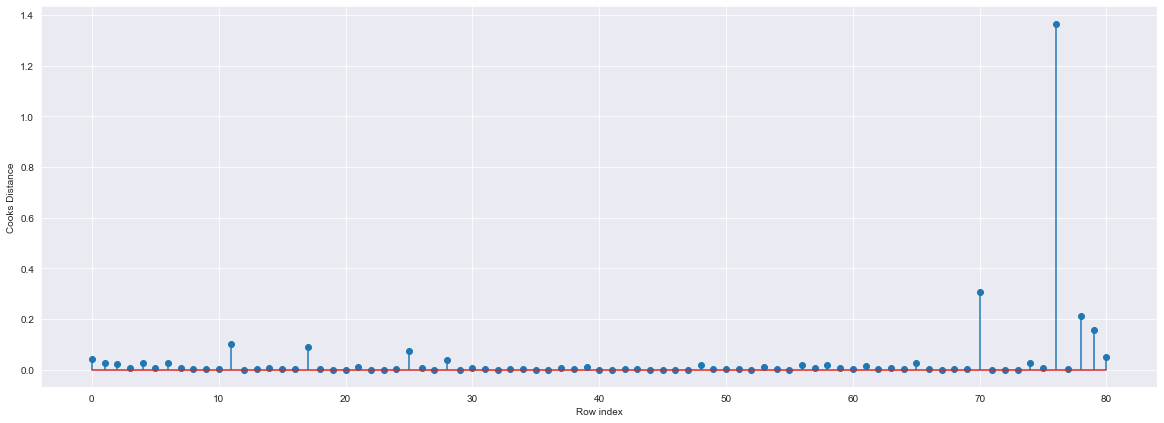

In [58]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.3664551371566103)

## High Influence points

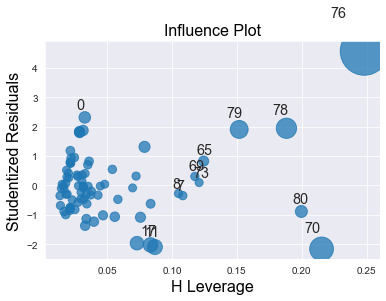

In [60]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [61]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [62]:
leverage_cutoff

0.2222222222222222

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [63]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [64]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [67]:
#Load the data
cars_new = pd.read_csv("/Users/chira/Downloads/cars.csv")

In [68]:
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [71]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [72]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [73]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [75]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~SP+HP+VOL',data = car1).fit()

In [76]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161692010376006, 446.1172263944773)

In [77]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [78]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(0.8160034320495304, 446.1884323575032, 455.66622376737126)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [79]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

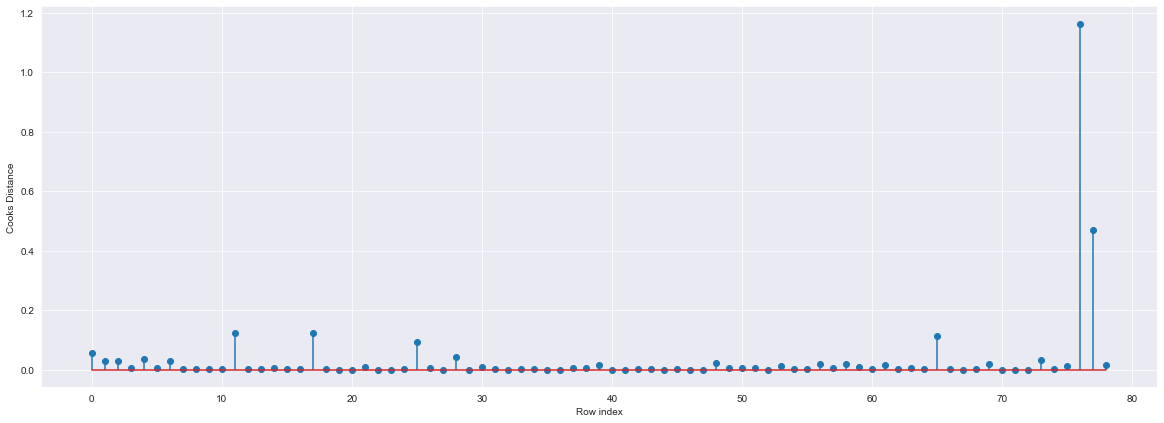

In [80]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [81]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [84]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [85]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [86]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [87]:
car4=car3.drop(['index'],axis=1)

In [88]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [92]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+HP+SP',data = car4).fit()

In [93]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

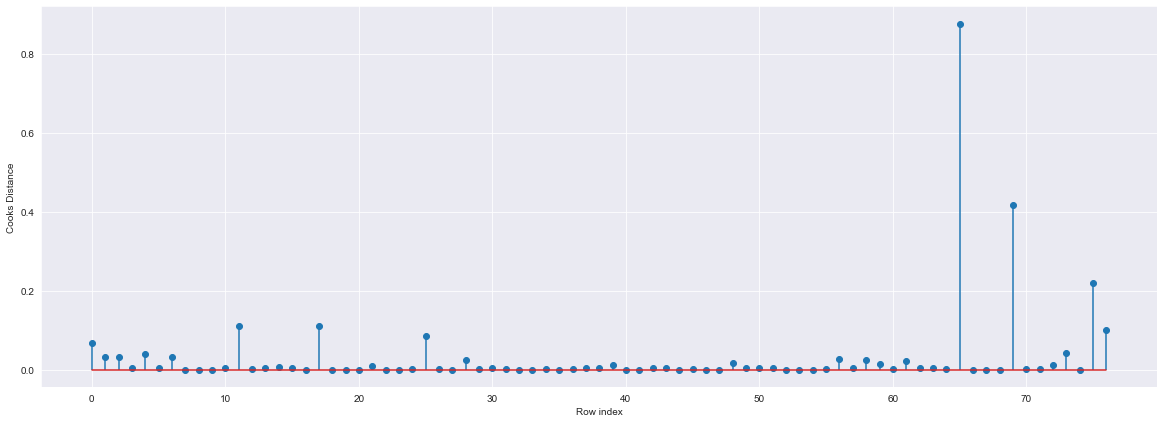

In [94]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [95]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.877455698629671)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [155]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Cylinders+Weight',data = car4).fit()

In [156]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8755059597579958, 24533.435928501447)

## Predicting for new data

In [97]:
#New data for prediction
new_data=pd.DataFrame({'HP':41,"VOL":100,"SP":132,"WT":65},index=[1])

In [98]:
final_ml_V.predict(new_data)

1    58.096512
dtype: float64

In [99]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [100]:
pred_y = final_ml_V.predict(cars_new)

In [101]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64